<a href="https://colab.research.google.com/github/miz-ab/week_7-Casualty/blob/main/notebooks/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))

import warnings
warnings.filterwarnings('ignore')

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from causalnex.structure.notears import from_pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
from script import load_file
from script.show_df_info import Df_Info
from script.clean_df import Df_clean

In [4]:
file_name = '../data/data.csv'
data = load_file.read_csv(file_name)

In [5]:
data_info = Df_Info(data)

#Lets, Describe the DataFrame

In [6]:
#Dataframe info
data_info.col_row_info()

Data Frame contain 569 rows and 33 columns


In [7]:
data_info.detailed_info()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Columns: 33 entries, id to Unnamed: 32
dtypes: float64(31), int64(1), object(1)
memory usage: 146.8+ KB
None


In [8]:
data_info.skewness()

id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

In [9]:
data_info.null_percentage()

Data Frame contain null values of 3.03%


In [10]:
data_info.get_null_counts()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [11]:
data_info.describe()

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [12]:
data_info.head()

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

#clean the Dataframe

In [13]:
clean_data = Df_clean(data)

In [14]:
col_with_many_null = clean_data.get_column_with_many_null()
clean_data.drop_columns(col_with_many_null)
col_with_many_null = clean_data.get_column_with_many_null()
col_with_many_null

[]

## Now get the percentage of null values in columns 

In [14]:
data_info = Df_Info(clean_data.df)
data_info.null_percentage()

Data Frame contain null values of 3.03%


## Remove Outliers

In [15]:
clean_data.df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [16]:
numeric_columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [17]:
for column in numeric_columns:
    clean_data.fix_outliers(column)

In [18]:
clean_data.save_clean()

## Graphical Analysis

In [19]:
cleaned_data = load_file.read_csv('../data/clean_data.csv')

In [20]:
mean_columns = [x for x in cleaned_data.columns if 'mean' in x]
mean_columns.extend(['id','diagnosis'])
selected_columns = [x for x in mean_columns]

data_selected = cleaned_data[selected_columns]
data_selected.set_index('id', inplace=True)
data_selected.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
id,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,M
842517,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,M
84300903,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,M
84348301,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,M
84358402,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,M


In [21]:
data_selected.skew()

radius_mean               0.655953
texture_mean              0.449700
perimeter_mean            0.701081
area_mean                 0.922884
smoothness_mean           0.257712
compactness_mean          0.826755
concavity_mean            1.023859
concave points_mean       1.004049
symmetry_mean             0.403621
fractal_dimension_mean    0.682430
dtype: float64

<Figure size 648x504 with 0 Axes>

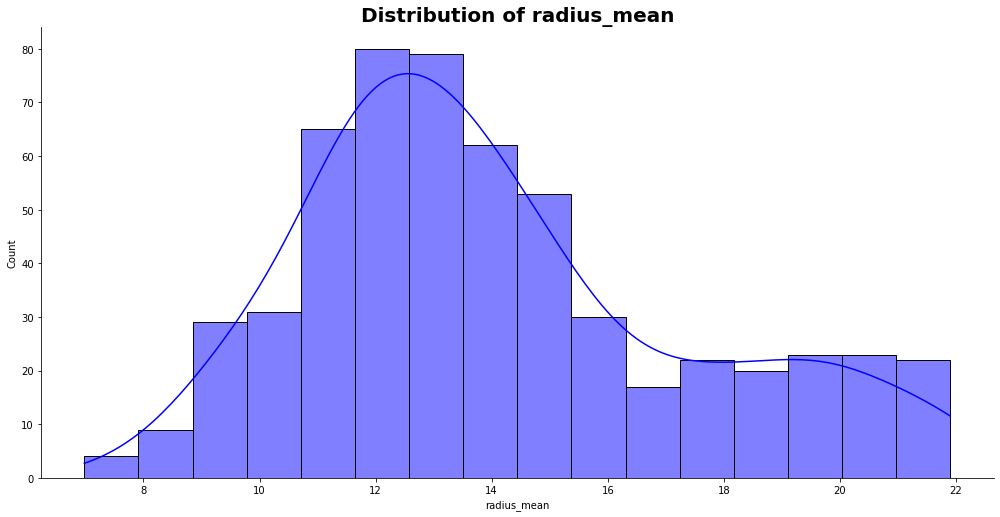

In [22]:
from script import plot
plot.plot_histogram(data_selected, 'radius_mean', 'blue')

<Figure size 648x504 with 0 Axes>

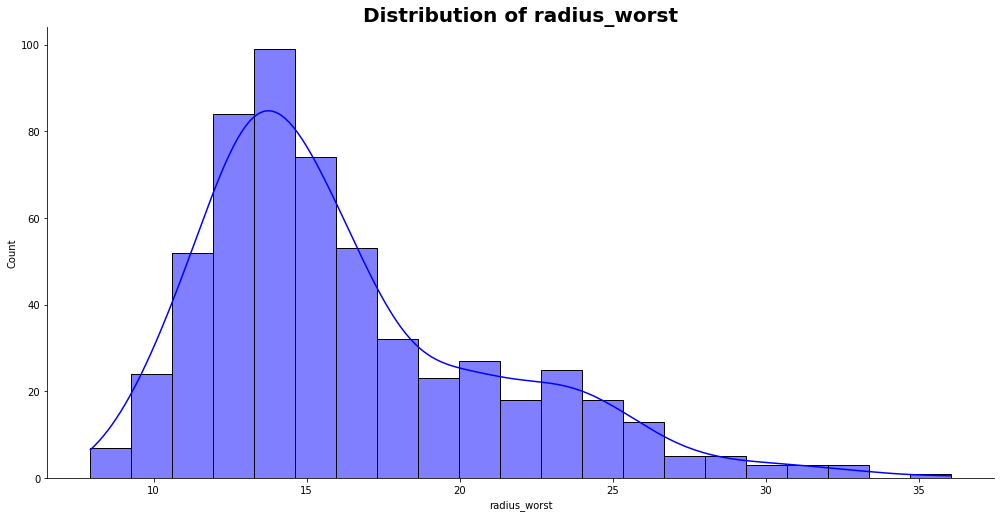

In [23]:

plot.plot_histogram(data, 'radius_worst', 'blue')

<Figure size 648x504 with 0 Axes>

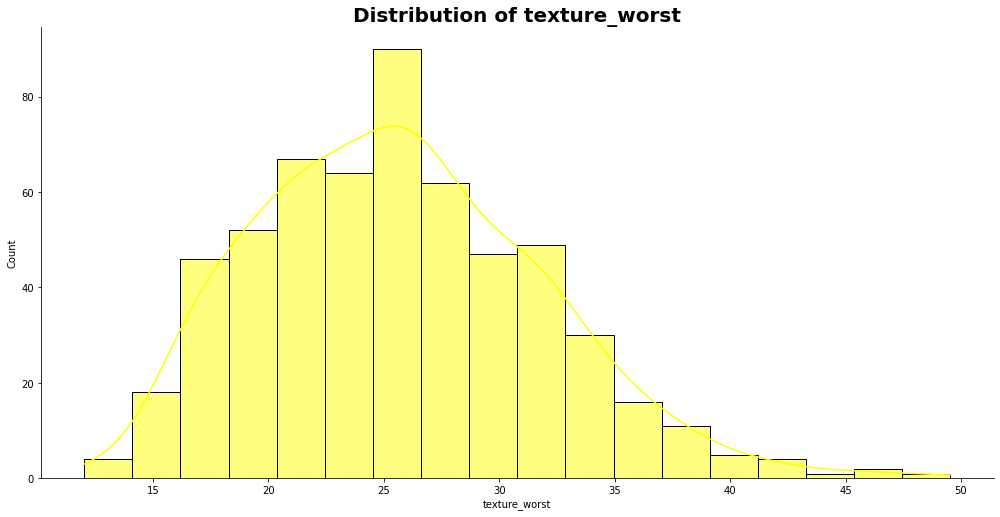

In [24]:
plot.plot_histogram(data, 'texture_worst', 'yellow')

<Figure size 648x504 with 0 Axes>

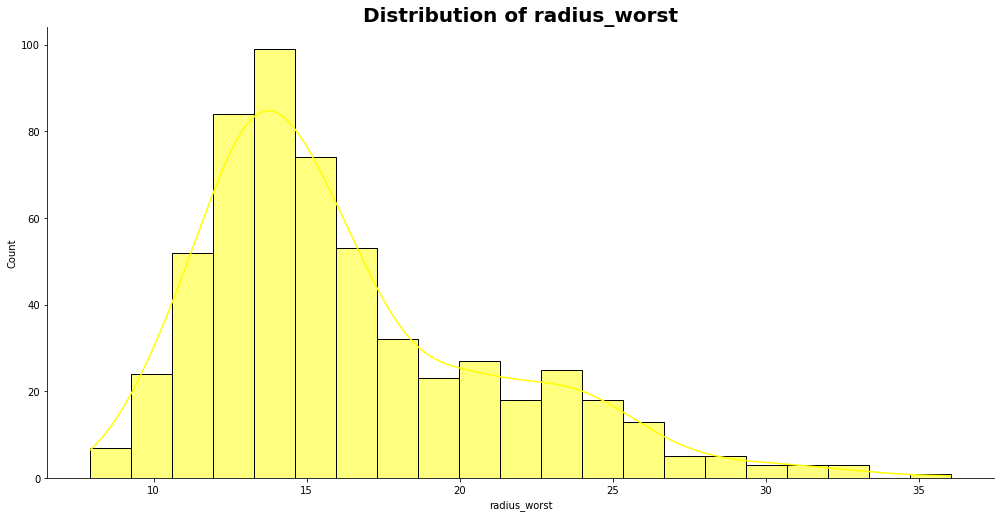

In [25]:
plot.plot_histogram(data, 'radius_worst', 'yellow')

In [27]:
cleaned_data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,84358402,M,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.127800,0.17000,0.15780,0.08089,0.2087,0.07613,0.33450,0.8902,2.2170,27.19,0.007510,0.033450,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.60,0.1791,0.52490,0.5355,0.1741,0.39850,0.12301
6,844359,M,18.25,19.98,119.60,1040.0,0.094630,0.10900,0.11270,0.07400,0.1794,0.05742,0.44670,0.7732,3.1800,53.91,0.004314,0.013820,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.00,0.1442,0.25760,0.3784,0.1932,0.30630,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.118900,0.16450,0.09366,0.05985,0.2196,0.07451,0.58350,1.3770,3.8560,50.96,0.008805,0.030290,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.00,0.1654,0.36820,0.2678,0.1556,0.31960,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.127300,0.19320,0.18590,0.09353,0.2350,0.07389,0.30630,1.0020,2.4060,24.32,0.005731,0.035020,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.30,0.1703,0.54010,0.5390,0.2060,0.41915,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.118600,0.22862,0.22730,0.08543,0.2030,0.07875,0.29760,1.5990,2.0390,23.94,0.007149,0.061505,0.07743,0.01432,0.01789,0.008023,15.09,40.68,97.65,711.40,0.1853,0.62695,0.7855,0.2210,0.41915,0.12301


In [31]:
cleaned_data[:50]
cleaned_data['diagnosis'] = cleaned_data['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
cleaned_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,0.07871,0.84865,0.9053,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,0.05667,0.54350,0.7339,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,0.05999,0.74560,0.7869,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,0.07875,0.49560,1.1560,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,0.05883,0.75720,0.7813,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678,NaN


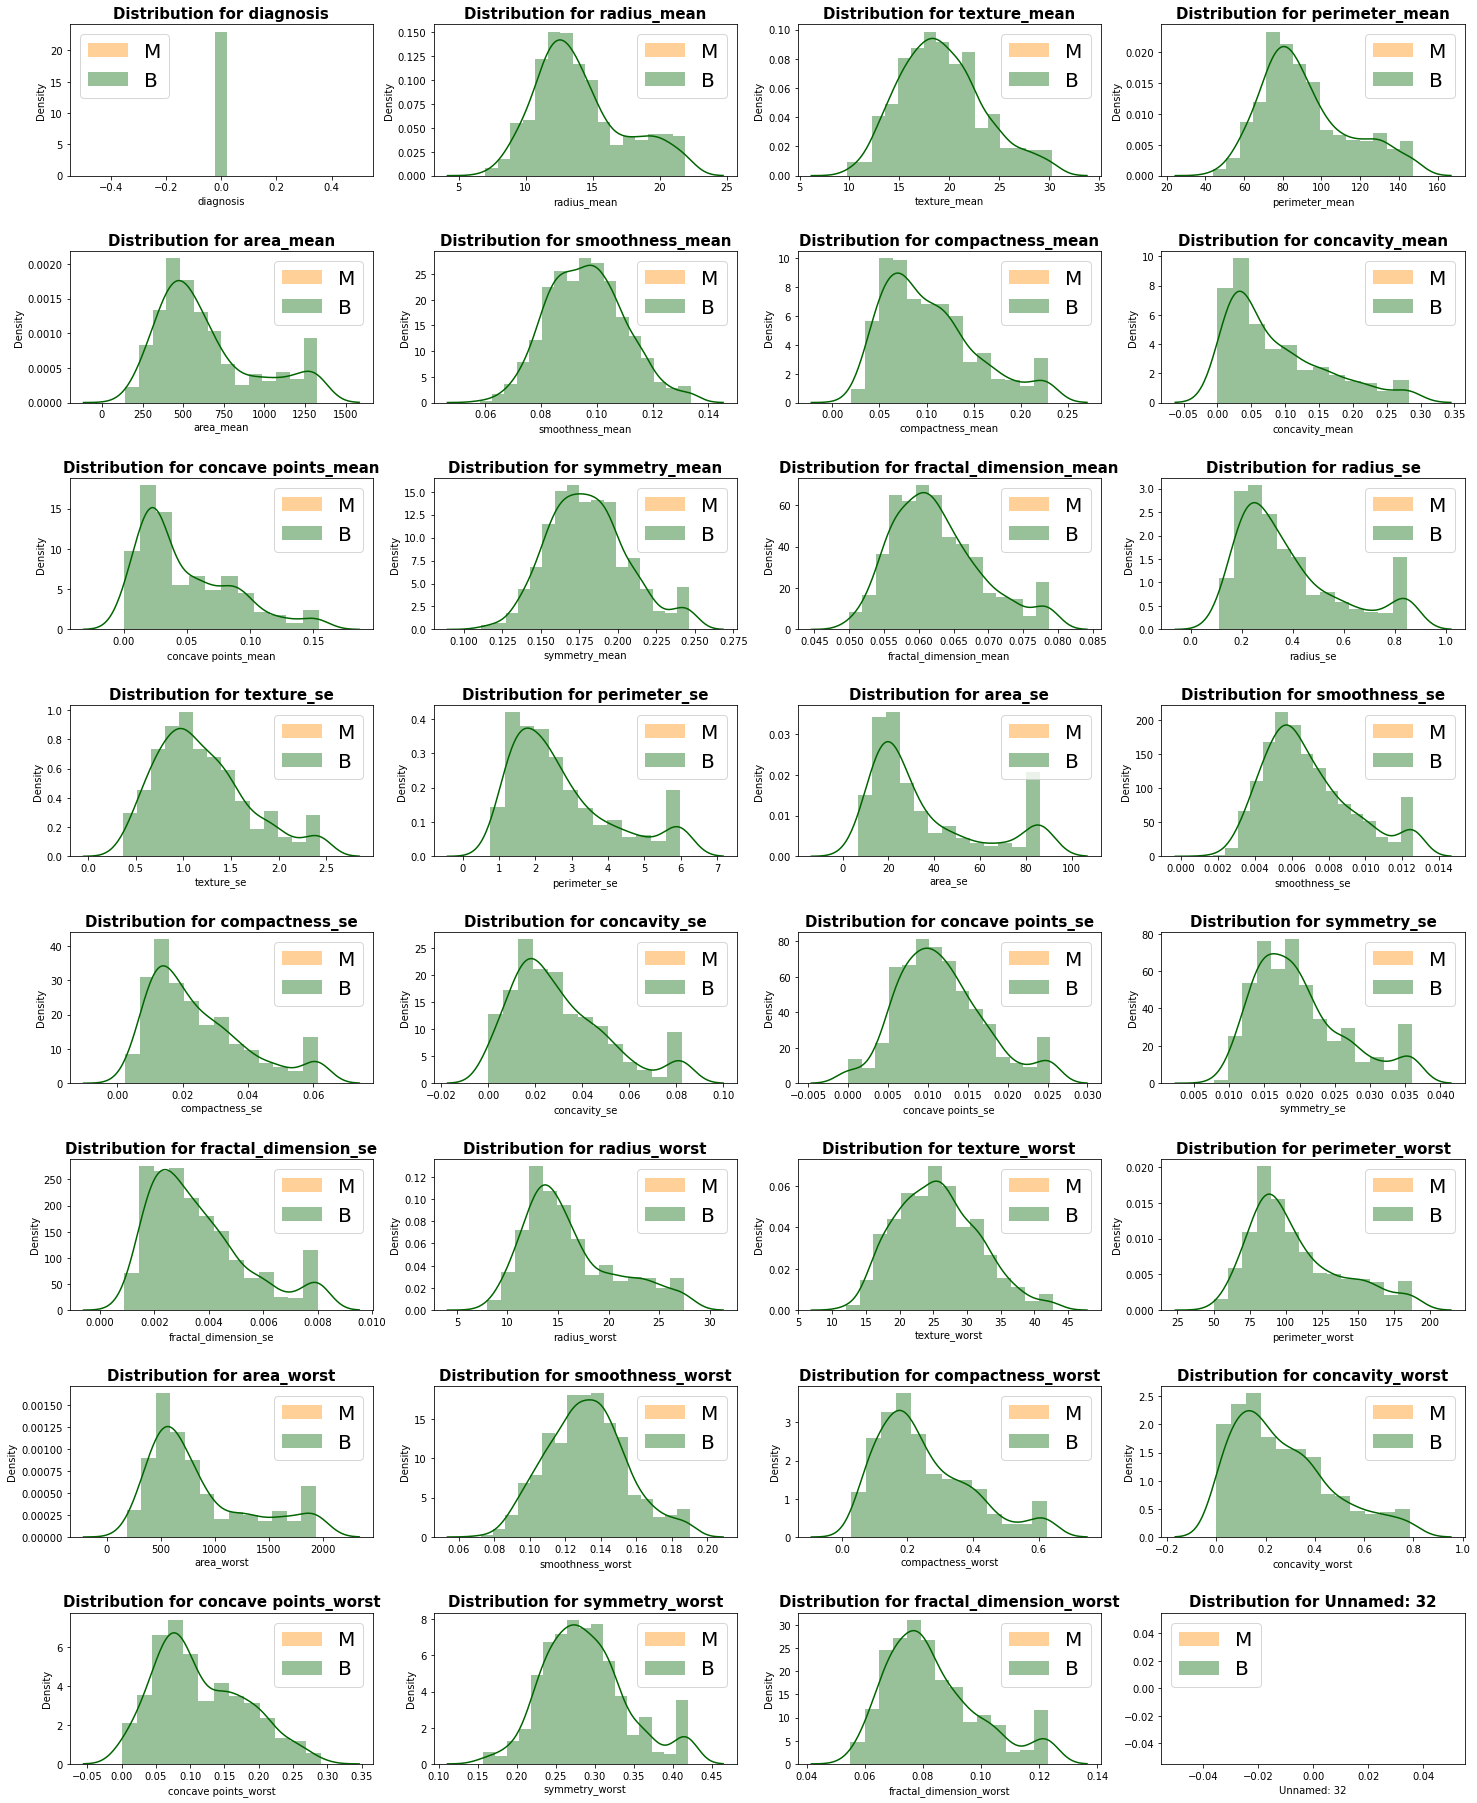

In [34]:

num_feat = cleaned_data.shape[1]-1
fig = plt.figure(figsize=(25, num_feat))
fig.subplots_adjust(hspace=.5)
axs = [fig.add_subplot(num_feat / 4, 4, i + 1) for i in range(num_feat)]

for i, column in enumerate(cleaned_data.columns[1:]):
    sns.distplot(cleaned_data[cleaned_data.diagnosis == 1][column], ax=axs[i], color='darkorange', label="M")
    sns.distplot(cleaned_data[cleaned_data.diagnosis == 0][column], ax=axs[i], color='darkgreen', label="B")
    axs[i].set_title('Distribution for {}'.format( column), fontweight='bold', fontsize=15)
    axs[i].legend(fontsize=20)
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

cleaned_data.loc[cleaned_data['diagnosis'] == 'M', 'diagnosis'] = 1.0
cleaned_data.loc[cleaned_data['diagnosis'] == 'B', 'diagnosis'] = 0.0

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(cleaned_data)
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(cleaned_data)

#scaler = StandardScaler()
#scaler.fit(cleaned_data)

x_after_Standardisation

array([[-0.23640517,  1.29767572,  1.17679966, ...,  2.29607613,
         2.44391811,  2.2252465 ],
       [-0.23640344,  1.29767572,  1.94992874, ...,  1.0870843 ,
        -0.2344085 ,  0.35531394],
       [ 0.43174109,  1.29767572,  1.6862258 , ...,  1.95500035,
         1.36905724,  0.2651967 ],
       ...,
       [-0.23572747,  1.29767572,  0.76026888, ...,  0.41406869,
        -1.22287173, -0.32181693],
       [-0.23572517,  1.29767572,  1.95891861, ...,  2.28998549,
         2.24975568,  2.48245611],
       [-0.24240586, -0.77060855, -1.88874705, ..., -1.74506282,
        -0.00958885, -0.81057776]])

In [41]:
sm = from_pandas(cleaned_data.iloc[:, :12], tabu_parent_nodes=['diagnosis'],)
Image(plot.plot_structure_1(sm).draw(format="png"))

OSError: Warning: node 'id', graph '' size too small for label
Warning: node 'radius_mean', graph '' size too small for label
Warning: node 'texture_mean', graph '' size too small for label
Warning: node 'perimeter_mean', graph '' size too small for label
Warning: node 'area_mean', graph '' size too small for label
Warning: node 'smoothness_mean', graph '' size too small for label
Warning: node 'compactness_mean', graph '' size too small for label
Warning: node 'concavity_mean', graph '' size too small for label
Warning: node 'concave points_mean', graph '' size too small for label
Warning: node 'symmetry_mean', graph '' size too small for label
Warning: node 'fractal_dimension_mean', graph '' size too small for label
Warning: node 'diagnosis', graph '' size too small for label


In [35]:
from causalnex.structure import StructureModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

sm = StructureModel()

sm.add_edges_from([
    ('diagnosis', 'radius_mean'),
    ('diagnosis', 'radius_worst')
])

In [36]:
sm.edges

OutEdgeView([('diagnosis', 'radius_mean'), ('diagnosis', 'radius_worst')])

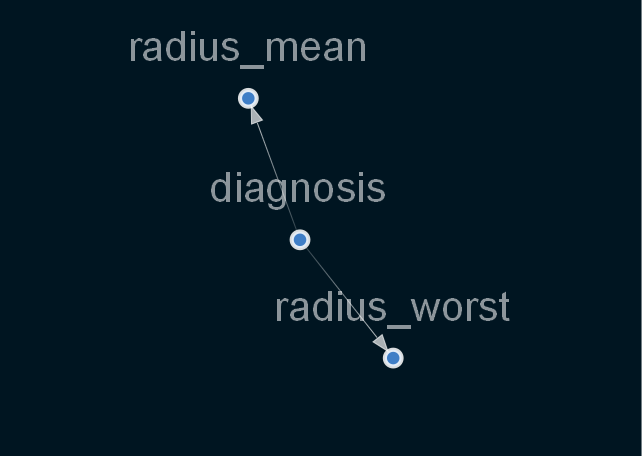

In [37]:
Image(plot.plot_structure_1(sm).draw(format="png"))

In [ ]:
'''
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))
'''

'\nviz = plot_structure(\n    sm,\n    graph_attributes={"scale": "0.5"},\n    all_node_attributes=NODE_STYLE.WEAK,\n    all_edge_attributes=EDGE_STYLE.WEAK)\nImage(viz.draw(format=\'png\'))\n'

In [ ]:

cleaned_data = cleaned_data.astype(int)
sm = from_pandas(cleaned_data)

In [ ]:
'''
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))
'''

Image(plot.plot_structure_2(sm).draw(format="png"))

TypeError: plot_structure() got an unexpected keyword argument 'graph_attributes'

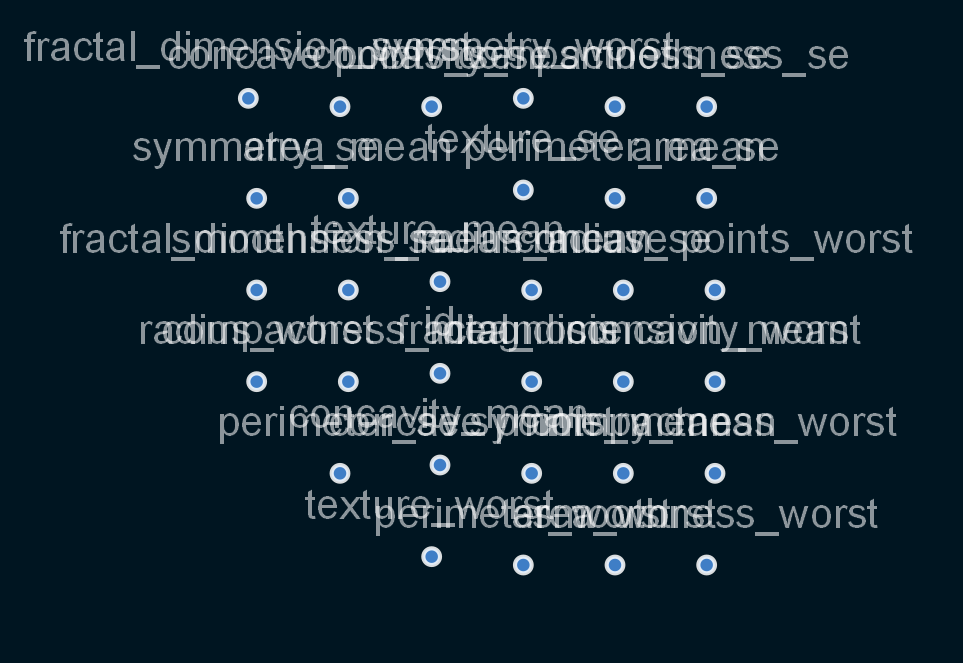

In [ ]:
sm.remove_edges_below_threshold(0.4)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.8"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

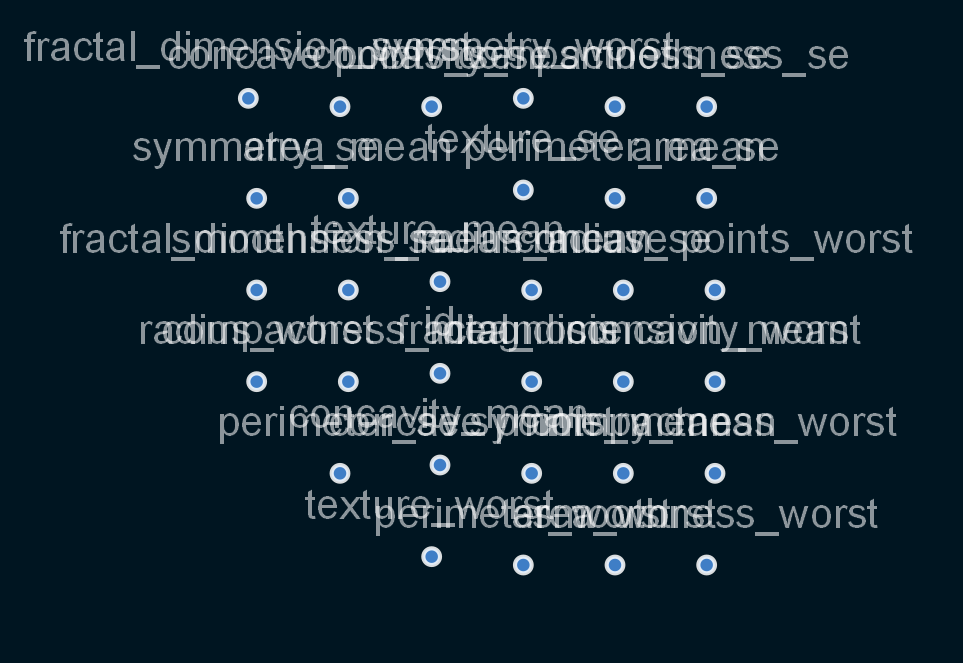

In [ ]:
sm = from_pandas(cleaned_data, tabu_edges=[("area_mean", "perimeter_mean")], w_threshold=0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))